In [2]:
!gdown https://drive.google.com/uc?id=1f1bBfON4yL-uNoOsanxjavWFGroXdFbJ -O data.csv

Downloading...
From: https://drive.google.com/uc?id=1f1bBfON4yL-uNoOsanxjavWFGroXdFbJ
To: /content/data.csv
100% 264k/264k [00:00<00:00, 74.5MB/s]


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [4]:
df = pd.read_csv('data.csv')

Gender \
Age \
Height                             \
Weight                            \
family_history_with_overweight     \
FAVC  -> Do you eat high caloric food frequently?                             \
FCVC -> Do you eat Vegetable in your meanl? \
NCP -> How many main meals do you have daily? \
CAEC -> Do you eat any food between meals? \
SMOKE -> Do you smoke?                              \
CH2O -> How much water do you drink? \
SCC -> Do you monitor the calories you eat  daily?                              \
FAF ->   How often do you have physical activity? \
TUE -> How much time do you use technological devices?                               \
CALC    ->    How often do you drink alcohol?                        \
MTRANS ->  Which transportation do you usually use?                            \
NObeyesdad -> Obesity Level \



In [5]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [8]:
df_numerical = df.select_dtypes(include=['number'])

In [9]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [10]:
df_numerical

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


<Axes: >

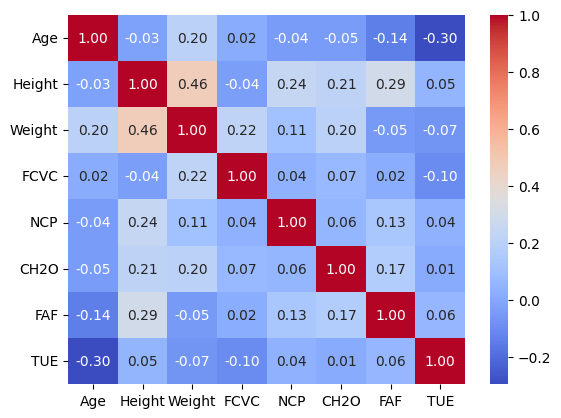

In [11]:
sns.heatmap(data = df_numerical.corr(), annot=True, fmt=".2f", cmap="coolwarm")

In [12]:
df_object = df.select_dtypes(include=['object'])

In [13]:
df_object.value_counts()

Gender  family_history_with_overweight  FAVC  CAEC       SMOKE  SCC  CALC        MTRANS                 NObeyesdad         
Female  yes                             yes   Sometimes  no     no   Sometimes   Public_Transportation  Obesity_Type_III       321
Male    yes                             yes   Sometimes  no     no   Sometimes   Public_Transportation  Obesity_Type_II        130
                                                                                                        Overweight_Level_II     76
                                                                     no          Public_Transportation  Obesity_Type_I          75
                                                                     Sometimes   Automobile             Obesity_Type_II         74
                                                                                                                              ... 
Female  yes                             yes   Sometimes  yes    no   no          Automobil

In [1]:
# Encoding categorical variables
le = LabelEncoder()
binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
for col in binary_columns:
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df, columns=['CAEC', 'CALC', 'MTRANS'])

# Feature scaling
scaler = StandardScaler()
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


NameError: name 'pd' is not defined

In [ ]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,-0.522124,-0.875589,-0.862558,1,0,-0.785019,0.404153,0,-0.013073,...,False,False,False,False,True,False,False,False,True,False
1,0,-0.522124,-1.947599,-1.168077,1,0,1.088342,0.404153,1,1.618759,...,False,False,False,True,False,False,False,False,True,False
2,1,-0.206889,1.054029,-0.366090,1,0,-0.785019,0.404153,0,-0.013073,...,False,False,True,False,False,False,False,False,True,False
3,1,0.423582,1.054029,0.015808,0,0,1.088342,0.404153,0,-0.013073,...,False,False,True,False,False,False,False,False,False,True
4,1,-0.364507,0.839627,0.122740,0,0,-0.785019,-2.167023,0,-0.013073,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,-0.525774,0.097045,1.711763,1,1,1.088342,0.404153,0,-0.456705,...,False,False,False,True,False,False,False,False,True,False
2107,0,-0.367195,0.502844,1.800914,1,1,1.088342,0.404153,0,-0.004702,...,False,False,False,True,False,False,False,False,True,False
2108,0,-0.281909,0.541672,1.798868,1,1,1.088342,0.404153,0,0.075361,...,False,False,False,True,False,False,False,False,True,False
2109,0,0.007776,0.404927,1.785780,1,1,1.088342,0.404153,0,1.377801,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [ ]:
X = df.drop('NObeyesdad', axis=1)  # Features
y = df['NObeyesdad']  # Target variable

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
X_test.shape

(423, 26)

In [ ]:

# Initializing the classifier with entropy
clf = DecisionTreeClassifier(criterion='entropy',random_state=10)

# Training the classifier
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred, digits=2))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9598
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.98      0.93        51
      Normal_Weight       0.96      0.85      0.90        54
     Obesity_Type_I       0.94      1.00      0.97        63
    Obesity_Type_II       1.00      0.96      0.98        56
   Obesity_Type_III       1.00      0.99      0.99        74
 Overweight_Level_I       0.96      0.96      0.96        71
Overweight_Level_II       0.96      0.96      0.96        54

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423

Confusion Matrix:
[[50  1  0  0  0  0  0]
 [ 6 46  0  0  0  2  0]
 [ 0  0 63  0  0  0  0]
 [ 0  0  2 54  0  0  0]
 [ 0  0  1  0 73  0  0]
 [ 0  1  0  0  0 68  2]
 [ 0  0  1  0  0  1 52]]


In [ ]:
from matplotlib import pyplot as plt

<Figure size 1200x800 with 0 Axes>

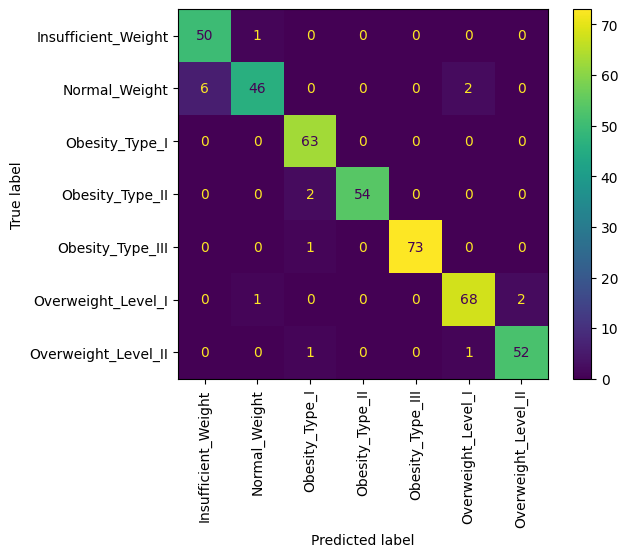

In [ ]:
disp  = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = clf.classes_)
# disp.figure(figsize=(12,8))
plt.figure(figsize=(12, 8))
disp.plot()
plt.xticks(rotation=90)
plt.savefig("confusion_matrix_entropy.png", bbox_inches='tight')
# Displaing the plot
plt.show()

In [ ]:
# plot_tree(clf)

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,8), dpi=600)
# plot_tree(clf,filled=True,rounded=True, ax=axes)
# # plt.savefig('foo.png')



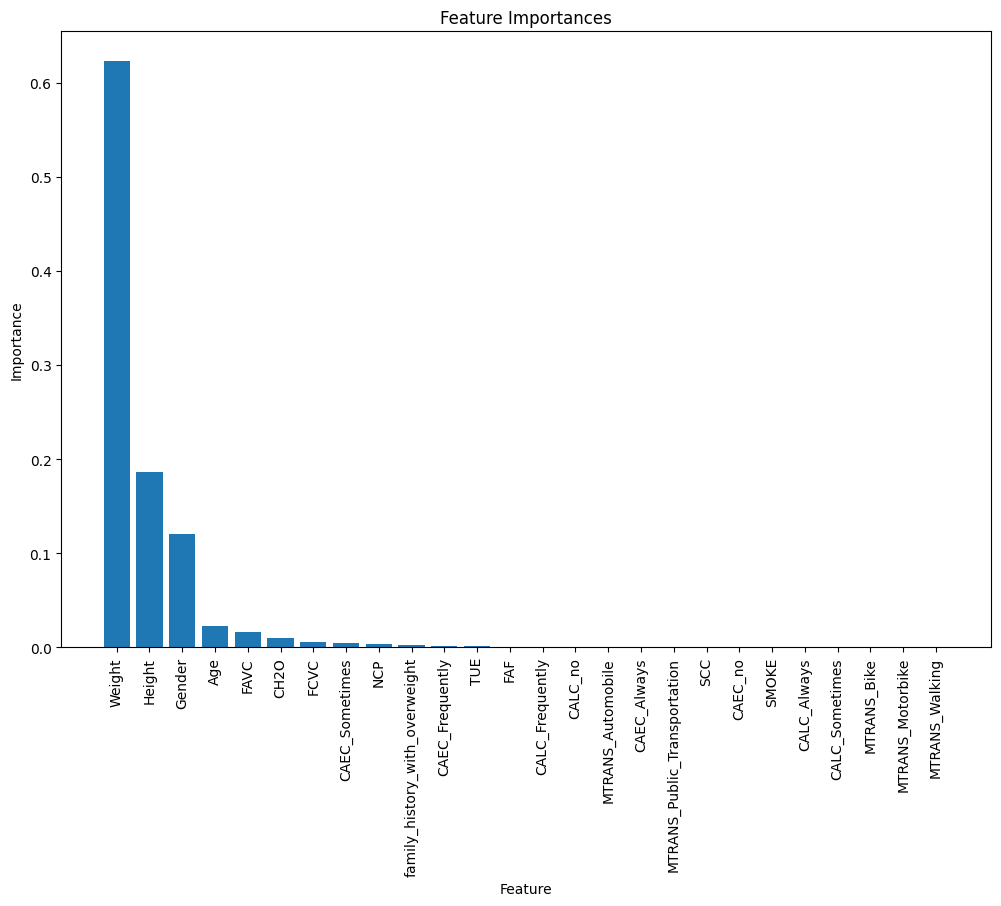

In [ ]:
import numpy as np

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.savefig("feature_importance_entropy.png")
plt.show()



In [14]:
# performing grid search for finding optimum hyper-parameter

parameter = {
    'criterion' :['entropy','gini','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'max_features':['auto','sqrt','log2']
}
model = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(model,param_grid = parameter,cv = 5)
cv.fit(X_train,y_train)



NameError: name 'X_train' is not defined

In [ ]:
cv.score(X_test,y_test)
cv.best_params_


{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'splitter': 'best'}